In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.model_selection import cross_val_score
from pandas import ExcelWriter

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [19]:
pred_dt = pd.read_csv("../../submissions/sub-dt-20170508-194246.csv")
pred_elasticnet = pd.read_csv("../../submissions/sub-elasticnet-20170508-194359.csv")
pred_et = pd.read_csv("../../submissions/sub-et-20170508-194338.csv")
pred_lars = pd.read_csv("../../submissions/sub-lars-20170508-195411.csv")
pred_lasso = pd.read_csv("../../submissions/sub-lasso-20170508-194355.csv")
pred_lgb = pd.read_csv("../../submissions/sub-lgb-20170508-194354.csv")
pred_rf = pd.read_csv("../../submissions/sub-rf-20170508-194334.csv")
pred_ridge = pd.read_csv("../../submissions/sub-ridge-20170508-194357.csv")
pred_svm = pd.read_csv("../../submissions/sub-svm-rbf-20170508-194403.csv")
pred_xgb = pd.read_csv("../../submissions/sub-xgb-20170508-194350.csv")
#pred_ensemble = pd.read_csv("ensembled_results.csv")

In [20]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [21]:
# Scatter plot
def scatplot(a,b):
    scatplotdata = pd.DataFrame({"x":a, "y":b})
    scatplotdata.plot(x = "x", y = "y", kind = "scatter")
    return()

In [22]:
pred_all = pred_dt.merge(pred_elasticnet, on = "Id").merge(pred_et, on = "Id").merge(pred_lars, on = "Id").merge(pred_lasso, on = "Id").merge(pred_lgb, on = "Id").merge(pred_rf, on = "Id").merge(pred_ridge, on = "Id").merge(pred_svm, on = "Id").merge(pred_xgb, on = "Id")#.merge(pred_ensemble, on = "Id")

In [23]:
#pred_all

In [24]:
id = pred_all["Id"]
pred_all = pred_all.drop("Id", axis=1)
pred_all.columns = ["dt", "elasticnet", "et", "lars", "lasso", "lgb", "rf", "ridge", "svm", "xgb"]#,"ensemble"]
corrmat = pred_all.corr()

cols = corrmat.index

In [25]:
cols

Index(['dt', 'elasticnet', 'et', 'lars', 'lasso', 'lgb', 'rf', 'ridge', 'svm',
       'xgb'],
      dtype='object')

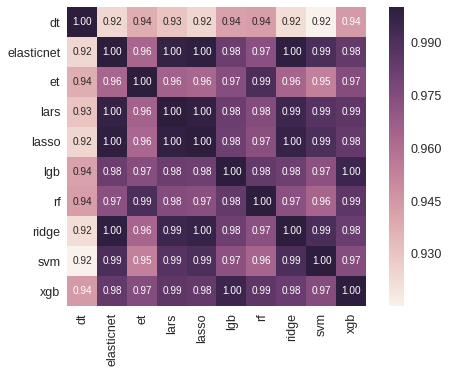

In [26]:
cm = np.corrcoef(pred_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

#
#
# Ensembling
#
#

# The best performing model

In [27]:
model_elasticnet = pred_all["elasticnet"]

result = pd.concat([id,model_elasticnet], axis=1)
result.columns =["Id","SalePrice"]
result.to_csv("./elasticnet.csv", index = False)

# Simple average of 10 models

In [28]:
#id
simple_average_10models = pred_all.mean(axis=1)

result = pd.concat([id,simple_average_10models], axis=1)
result.columns =["Id","SalePrice"]
result.to_csv("./average-10models.csv", index = False)

# Simple average of best 5 models


In [29]:
simple_average_5models = (pred_all["elasticnet"]+pred_all["lasso"]+pred_all["ridge"]+pred_all["xgb"]+pred_all["lars"])/5

# Unquote the following three lines to take median instead of mean
#simple_average_5models = pred_elasticnet.merge(pred_lasso, on = "Id").merge(pred_ridge, on = "Id").merge(pred_xgb, on = "Id").merge(pred_lars, on = "Id")
#simple_average_5models = simple_average_5models.drop("Id", axis=1)
#simple_average_5models = simple_average_5models.median(axis=1)

result = pd.concat([id,simple_average_5models], axis=1)
result.columns =["Id","SalePrice"]
result.to_csv("./average-5models.csv", index = False)

# Simple average of best 5 uncorrelated models

In [30]:
simple_average_best_uncorr_5models = (pred_all["elasticnet"]+pred_all["et"]+pred_all["lgb"]+pred_all["rf"]+pred_all["xgb"])/5

# Unquote the following three lines to take median instead of mean
#simple_average_best_uncorr_5models = pred_elasticnet.merge(pred_et, on = "Id").merge(pred_lgb, on = "Id").merge(pred_rf, on = "Id").merge(pred_xgb, on = "Id")
#simple_average_best_uncorr_5models = simple_average_best_uncorr_5models.drop("Id", axis=1)
#simple_average_best_uncorr_5models = simple_average_best_uncorr_5models.median(axis=1)


result = pd.concat([id,simple_average_best_uncorr_5models], axis=1)
result.columns =["Id","SalePrice"]
result.to_csv("./average-best-uncorr-5models.csv", index = False)

# Weighted average of best 5 uncorrelated models

In [31]:
w_elasticnet = 1/0.11375
w_et = 1/0.13733
w_lgb = 1/0.12299
w_rf = 1/0.13123
w_xgb = 1/0.11854

weighted_average_best_uncorr_5models = (pred_all["elasticnet"] * w_elasticnet + pred_all["et"] * w_et + pred_all["lgb"] * w_lgb + pred_all["rf"] * w_rf + pred_all["xgb"] * w_xgb)/(w_elasticnet + w_et + w_lgb + w_rf + w_xgb)

result = pd.concat([id,weighted_average_best_uncorr_5models], axis=1)
result.columns =["Id","SalePrice"]
result.to_csv("./weighted-average-best-uncorr-5models.csv", index = False)

# Summary of Results (LB score)

                                                 Mean     Median
1. Best performing model (elastic net):         0.12005 
2. Simple average of 10 models:                 0.12332   0.12008
3. Simple average of best 5 models:             0.11932   0.12010
4. Simple average of 5 best uncorrelated models:0.12416   0.12285
5. Weighted avg of best uncorrelated models:    0.12358

()

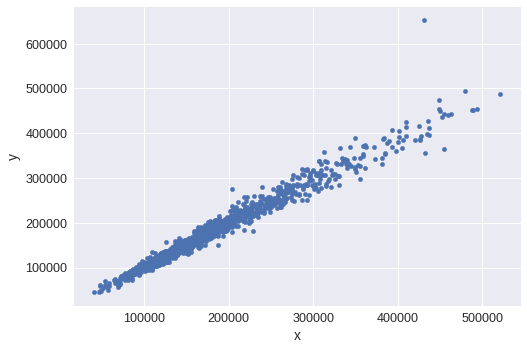

In [32]:
scatplot(pred_all["xgb"],pred_all["lasso"])

In [33]:
#print(pred_elasticnet.sort_values(by = 'SalePrice', ascending = False))